In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

users = pd.read_csv("CSV2/users_cleaned.csv", parse_dates=["created_at"])
orders = pd.read_csv("CSV2/orders_cleaned.csv")
order_items = pd.read_csv("CSV2/order_items_cleaned.csv")

Distribuzione utenti per fasce d'età:
age_group
<20      13475
20-35    27017
36-55    34032
>55      25476
Name: count, dtype: int64


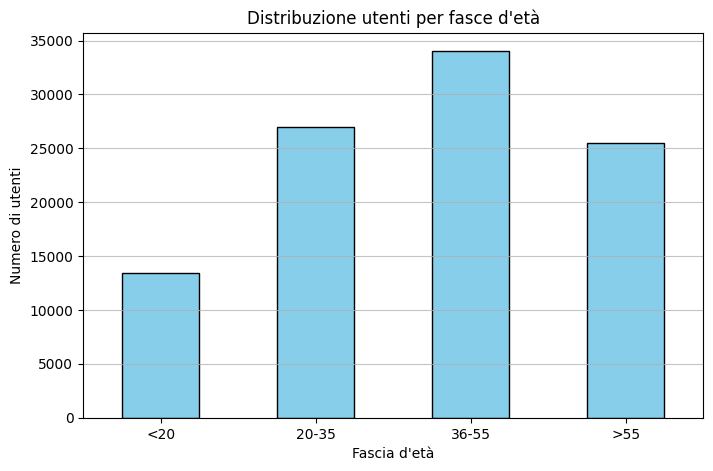

In [2]:
# Definisci le fasce d'età  
bins = [0, 19, 35, 55, 120]  
labels = ['<20', '20-35', '36-55', '>55']  
  
# Crea la colonna con le fasce d'età  
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=True)  
  
# Conta quanti utenti ci sono in ogni fascia  
age_group_counts = users['age_group'].value_counts().sort_index()  
  
# Stampa la distribuzione  
print("Distribuzione utenti per fasce d'età:")  
print(age_group_counts)  
  
# Grafico a barre  
plt.figure(figsize=(8, 5))  
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')  
plt.title("Distribuzione utenti per fasce d'età")  
plt.xlabel("Fascia d'età")  
plt.ylabel("Numero di utenti")  
plt.grid(axis='y', alpha=0.75)  
plt.xticks(rotation=0)  
plt.show()

In [3]:
gender_counts = users["gender"].value_counts(dropna=False)
gender_pct = (gender_counts / len(users) * 100).round(2)

gender_summary = pd.DataFrame({
    "count": gender_counts,
    "percentage": gender_pct
})

print("Distribuzione per genere:")
print(gender_summary)

Distribuzione per genere:
        count  percentage
gender                   
F       50072       50.07
M       49928       49.93


Top 10 stati per numero di utenti:
state
Guangdong     5272
England       4065
California    3672
Texas         2454
Shanghai      2388
São Paulo     2215
Zhejiang      2086
Beijing       2013
Jiangsu       1971
Hebei         1969
Name: count, dtype: int64


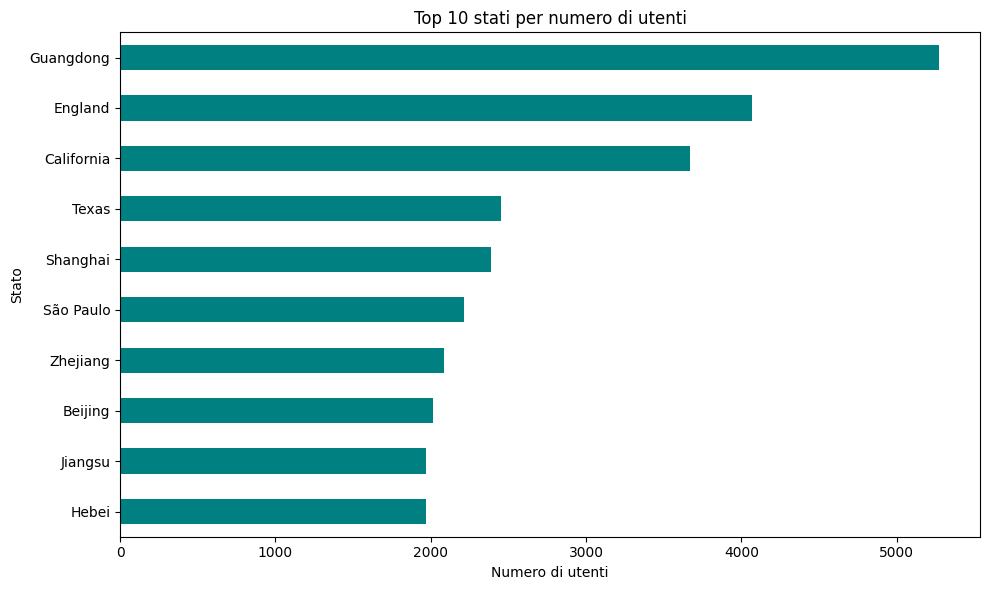

In [4]:
# Conta utenti per stato
state_counts = users['state'].value_counts().head(10)

print("Top 10 stati per numero di utenti:")
print(state_counts)

# Grafico a barre orizzontali
state_counts.sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 10 stati per numero di utenti")
plt.xlabel("Numero di utenti")
plt.ylabel("Stato")
plt.tight_layout()
plt.show()

Top 10 città per numero di utenti:
city
Shanghai    2426
Beijing     2061
Seoul       1493
Shenzhen    1344
Dongguan     932
Tokyo        894
New York     859
Chengdu      802
Foshan       762
Wuhan        760
Name: count, dtype: int64


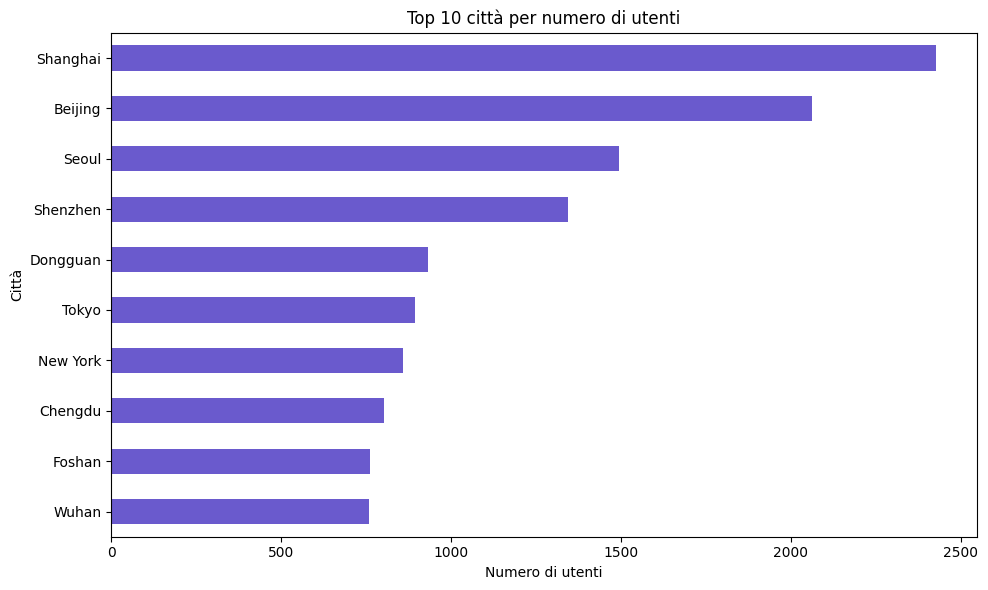

In [5]:
# Conta utenti per città
city_counts = users['city'].value_counts().head(10)

print("Top 10 città per numero di utenti:")
print(city_counts)

# Grafico a barre orizzontali
city_counts.sort_values().plot(kind='barh', figsize=(10, 6), color='slateblue')
plt.title("Top 10 città per numero di utenti")
plt.xlabel("Numero di utenti")
plt.ylabel("Città")
plt.tight_layout()
plt.show()

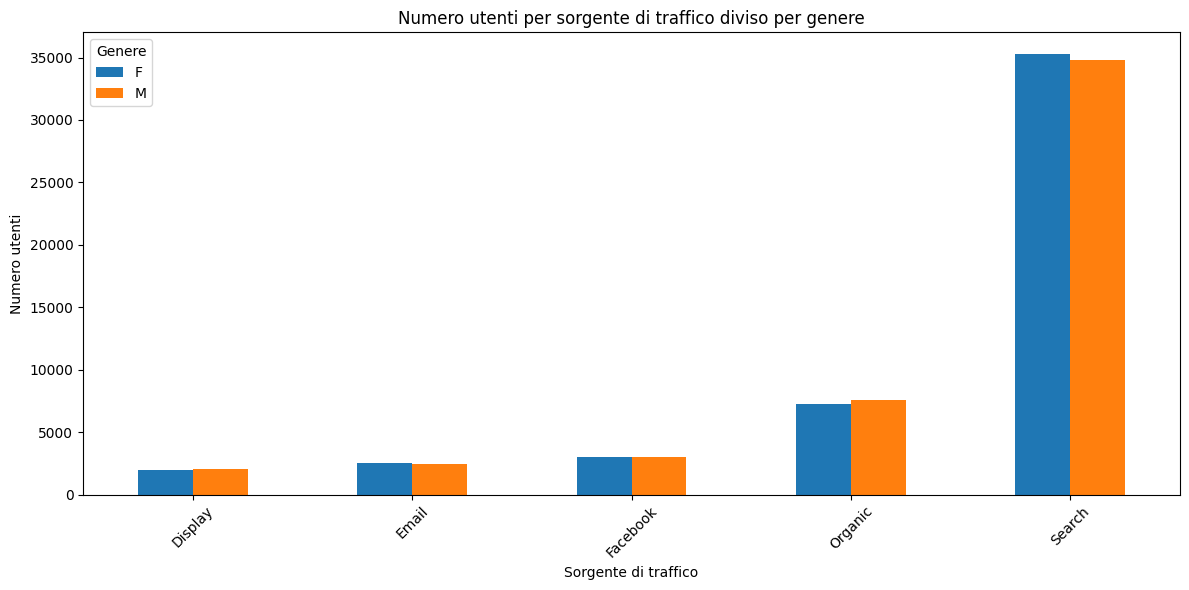

In [6]:
traffic_gender = (
    users.groupby(["gender", "traffic_source"])
         .size()
         .reset_index(name="users_count")
         .sort_values(["gender", "users_count"], ascending=[True, True])
)

pivot = traffic_gender.pivot(index="traffic_source", columns="gender", values="users_count").fillna(0)

pivot.plot(kind="bar", figsize=(12, 6))
plt.title("Numero utenti per sorgente di traffico diviso per genere")
plt.xlabel("Sorgente di traffico")
plt.ylabel("Numero utenti")
plt.xticks(rotation=45)
plt.legend(title="Genere")
plt.tight_layout()
plt.show()